<a href="https://colab.research.google.com/github/francomanca93/fundamentos-de-estadistica-con-python/blob/estadistica-analitica/4.%20Construir%20conceptos%20estad%C3%ADsticos%20anal%C3%ADticos/13_Teorema_del_limite_central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teorema del limite central

Este concepto nos permitirá aproximar la función de distribución de una variable aleatoria de la cual no conocemos previamente su distribución.

El teorema de limite central indica que si sumamos **n** variables aleatorias independientes con un **n > 30** podemos aproximar la función utilizando la curva de la función Normal o la curva de la campana de Gauss. Incluso si las variables aleatorias originales no se distribuyen como una normal.

Teorema formal:

![teorema_formal](https://imgur.com/gFmNE0j.png)

Teorema simplificado:

![teorema](https://imgur.com/5Lna2fR.png)

Propiedades

- El teorema del límite central garantiza una distribución aproximadamente normal cuando n es suficientemente grande.

- Existen diferentes versiones del teorema, en función de las condiciones utilizadas para asegurar la convergencia. Una de las más simples establece que es suficiente que las variables que se suman sean independientes, idénticamente distribuidas, con valor esperado y varianza finitas.

- La aproximación entre las dos distribuciones es, en general, mayor en el centro de las mismas que en sus extremos o colas, motivo por el cual se prefiere el nombre "teorema del límite central" ("central" califica al límite, más que al teorema).

- Este teorema, perteneciente a la teoría de la probabilidad, encuentra aplicación en muchos campos relacionados, tales como la inferencia estadística o la teoría de renovación.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import expon
from scipy.stats import uniform

## Para una distribucion exponencial

In [3]:
poblacion_expo = pd.DataFrame()
poblacion_expo['number'] = expon.rvs(10, size = 100000)

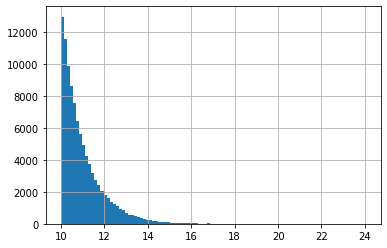

In [4]:
poblacion_expo['number'].hist(bins=100)

In [5]:
muestra_promedio_dis_expo = []

tamano = 5000

for i in range(0,tamano):
  muestra_promedio_dis_expo.append(poblacion_expo.sample(n=100).mean().values[0])

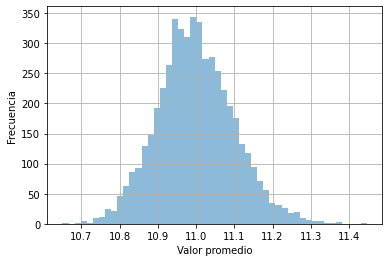

In [6]:
fig, ax = plt.subplots()
ax.hist(muestra_promedio_dis_expo, bins=50, alpha = 0.5)
ax.set_xlabel('Valor promedio')
ax.set_ylabel('Frecuencia')
ax.grid()

## Para una distribucion uniforme

In [7]:
poblacion_uniforme = pd.DataFrame()
poblacion_uniforme['number'] = uniform.rvs(10, size = 100000)

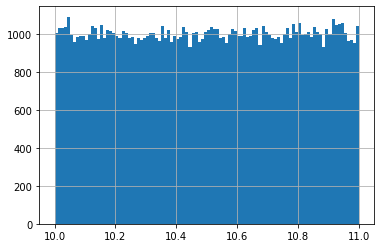

In [8]:
poblacion_uniforme['number'].hist(bins=100)

In [9]:
muestra_promedio_pob_uniforme = []

tamano = 5000

for i in range(0,tamano):
  muestra_promedio_pob_uniforme.append(poblacion_uniforme.sample(n=100).mean().values[0])

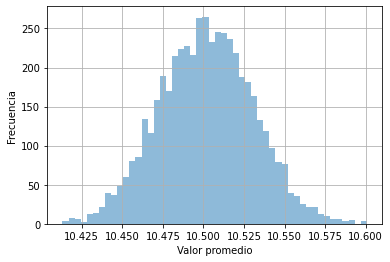

In [10]:
fig, ax = plt.subplots()
ax.hist(muestra_promedio_pob_uniforme, bins=50, alpha = 0.5)
ax.set_xlabel('Valor promedio')
ax.set_ylabel('Frecuencia')
ax.grid()

## Comparación

![comparacion](https://imgur.com/0Uygnnl.png)

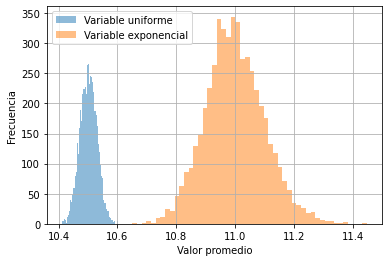

In [11]:
fig, ax = plt.subplots()

ax.hist(muestra_promedio_pob_uniforme, bins=50, alpha = 0.5, label='Variable uniforme')
ax.hist(muestra_promedio_dis_expo, bins=50, alpha = 0.5, label='Variable exponencial')

ax.set_xlabel('Valor promedio')
ax.set_ylabel('Frecuencia')
ax.legend()
ax.grid()

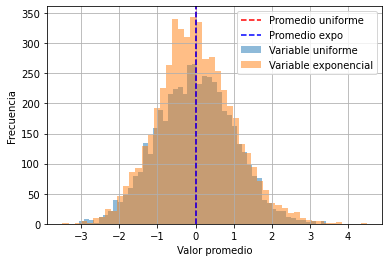

In [13]:
fig, ax = plt.subplots()

# Estandarizacion
z_uniforme = (muestra_promedio_pob_uniforme - np.mean(muestra_promedio_pob_uniforme)) / np.std(muestra_promedio_pob_uniforme)
z_expo = (muestra_promedio_dis_expo - np.mean(muestra_promedio_dis_expo)) / np.std(muestra_promedio_dis_expo)

ax.hist(z_uniforme, bins=50, alpha = 0.5, label='Variable uniforme')
ax.hist(z_expo, bins=50, alpha = 0.5, label='Variable exponencial')

ax.axvline(np.mean(z_uniforme), c='r', linestyle='--', label='Promedio uniforme')
ax.axvline(np.mean(z_expo), c='b', linestyle='--', label='Promedio expo')

ax.set_xlabel('Valor promedio')
ax.set_ylabel('Frecuencia')
ax.legend()
ax.grid()